# CIFAR-10: Training and Testing on a Clean Dataset & Adversarial Analysis

## Imports and CIFAR-10 loading

In [1]:
# Imports all the module paths
import sys

import torch

sys.path.append("../../")

# Loads the rest of the modules

# File containing all the required training methods
import defences.cifar10 as defences

# For testing
import utils.clean_test as clean_test

# Contains the data loadders
import utils.dataloaders as dataloaders

# For printing outcomes
# import utils.printing as printing

# Example printing, but I removed it to simplify results
# for epsilon in epsilons:
#     printing.print_attack(
#         model,
#         testSetLoader,
#         "FGSM",
#         attacks["FGSM"],
#         epsilon=epsilon,
#     )

Notebook will use PyTorch Device: CUDA
Notebook will use PyTorch Device: CUDA
Notebook will use PyTorch Device: CUDA
Notebook will use PyTorch Device: CUDA


## Load the dataset

In [2]:
DATA_ROOT = "../../datasets/CIFAR10"

trainSetLoader, _, testSetLoader = dataloaders.get_CIFAR10_data_loaders(
    DATA_ROOT,
    trainSetSize=50000,
    validationSetSize=0,
    batchSize=128,
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../../datasets/CIFAR10/cifar-10-python.tar.gz to ../../datasets/CIFAR10
Files already downloaded and verified
Files already downloaded and verified


## Note: the functions also provide a way to have shorter training times. However, this provides worse results. See my thesis for why.

## Standard Training

In [3]:
SAVE_LOAD_ROOT = "../../models_data/CIFAR10"

standard_model = defences.standard_training(
    trainSetLoader,
    load_if_available=True,
    load_path=SAVE_LOAD_ROOT + "/cifar10_standard",
)

Found already trained model...
... loaded!


In [4]:
# Test the model
clean_test.test_trained_model(standard_model, testSetLoader)

Testing the model...


Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 95.26%


In [5]:
# Save the model
torch.save(standard_model, SAVE_LOAD_ROOT + "/cifar10_standard")

## Attacks and Their Results

In [6]:
# A possible attacks array (for nice printing):
# Some attacks use a helper library
import torchattacks

import attacks.fgsm as fgsm
import attacks.ifgsm as ifgsm
import attacks.pgd as pgd
import utils.attacking as attacking

attacks = {}

attacks["FGSM"] = fgsm.fgsm_attack
attacks["I-FGSM"] = ifgsm.ifgsm_attack
attacks["PGD"] = pgd.pgd_attack

### FGSM (Fast Sign Gradient Method) https://arxiv.org/abs/1412.6572

The formula that is used for producing the adversarial example in this case is:

$x' = x + \epsilon * sign(\nabla_{x}J(\theta, x, y))$, where J is the loss function used.

In [7]:
# Several values to use for the epsilons
epsilons = [0, 0.05, 0.1, 0.2, 0.35, 0.55, 0.75, 1]

In [8]:
# Run test for each epsilon
for epsilon in epsilons:
    attacking.attack_model(
        standard_model,
        testSetLoader,
        "FGSM",
        attacks["FGSM"],
        epsilon=epsilon,
    )

Testing the model under FGSM Attack using epsilon = 0, alpha = None...


FGSM Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 95.26%


Testing the model under FGSM Attack using epsilon = 0.05, alpha = None...


FGSM Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 32.95%


Testing the model under FGSM Attack using epsilon = 0.1, alpha = None...


FGSM Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 16.61%


Testing the model under FGSM Attack using epsilon = 0.2, alpha = None...


FGSM Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 9.92%


Testing the model under FGSM Attack using epsilon = 0.35, alpha = None...


FGSM Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 9.19%


Testing the model under FGSM Attack using epsilon = 0.55, alpha = None...


FGSM Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 8.71%


Testing the model under FGSM Attack using epsilon = 0.75, alpha = None...


FGSM Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 8.91%


Testing the model under FGSM Attack using epsilon = 1, alpha = None...


FGSM Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 9.16%




### I-FGSM / BIM (Iterative FGSM / Basic Iterative Method) https://arxiv.org/abs/1607.02533

The formula that is used for producing the adversarial example in this case is:

$x'_{0} = x$
$x'_{k + 1} = Clip_{x, \epsilon} \{x'_{k} + \alpha * sign(\nabla_{x}J(\theta, x'_{k}, y)\}$, where J is the loss function used. Note that in the paper proposing this method, $\alpha = 1$ is used, so pixels are changed by 1 in each iteration.

The formula for the clip function is also given in the paper.

In [9]:
# Several values for epsilon. It's interesting to see how clamping affects results
epsilons = [0, 4 / 255, 0.05, 0.1, 0.2, 0.35, 0.55]

In [10]:
for epsilon in epsilons:
    attacking.attack_model(
        standard_model,
        testSetLoader,
        "I-FGSM",
        attacks["I-FGSM"],
        epsilon=epsilon,
        alpha=1,
        iterations=3,
    )

Testing the model under I-FGSM Attack using epsilon = 0, alpha = 1...


I-FGSM Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 95.26%


Testing the model under I-FGSM Attack using epsilon = 0.01568627450980392, alpha = 1...


I-FGSM Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 1.44%


Testing the model under I-FGSM Attack using epsilon = 0.05, alpha = 1...


I-FGSM Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 0.18%


Testing the model under I-FGSM Attack using epsilon = 0.1, alpha = 1...


I-FGSM Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 0.04%


Testing the model under I-FGSM Attack using epsilon = 0.2, alpha = 1...


I-FGSM Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 0.0%


Testing the model under I-FGSM Attack using epsilon = 0.35, alpha = 1...


I-FGSM Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 0.04%


Testing the model under I-FGSM Attack using epsilon = 0.55, alpha = 1...


I-FGSM Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 2.52%




### PGD (Projected Gradient Descent) https://arxiv.org/pdf/1706.06083.pdf

The formula that is used for producing the adversarial example in this case is:

$x^{t+1} = \Pi_{x+S}(x^t+\alpha sgn(\bigtriangledown_x L(\theta, x, y)))$\n
where S is a set of allowed perturbations. Note that this is basically BIM with random initialisation. 

We use the $L_{\infty}$ norm here, i.e. we use clamping. 

In [11]:
# Several values to use for the epsilons
epsilons = [0, 4 / 255, 0.05, 0.1, 0.2, 0.35, 0.55, 0.75, 1]

In [12]:
for epsilon in epsilons:
    attacking.attack_model(
        standard_model,
        testSetLoader,
        "PGD",
        attacks["PGD"],
        epsilon=epsilon,
        alpha=(2 / 255),
        iterations=20,
    )

Testing the model under PGD Attack using epsilon = 0, alpha = 0.00784313725490196...


PGD Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 95.26%


Testing the model under PGD Attack using epsilon = 0.01568627450980392, alpha = 0.00784313725490196...


PGD Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 0.22%


Testing the model under PGD Attack using epsilon = 0.05, alpha = 0.00784313725490196...


PGD Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 0.0%


Testing the model under PGD Attack using epsilon = 0.1, alpha = 0.00784313725490196...


PGD Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 0.0%


Testing the model under PGD Attack using epsilon = 0.2, alpha = 0.00784313725490196...


PGD Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 0.0%


Testing the model under PGD Attack using epsilon = 0.35, alpha = 0.00784313725490196...


PGD Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 0.0%


Testing the model under PGD Attack using epsilon = 0.55, alpha = 0.00784313725490196...


PGD Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 0.0%


Testing the model under PGD Attack using epsilon = 0.75, alpha = 0.00784313725490196...


PGD Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 0.0%


Testing the model under PGD Attack using epsilon = 1, alpha = 0.00784313725490196...


PGD Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 0.0%




### DeepFool https://arxiv.org/pdf/1511.04599.pdf

The formula here is complex, so I recommend for the interested reader to go the above link to read the full paper.

In [13]:
deepfool_attack = torchattacks.DeepFool(standard_model, steps=10)
attacks["DeepFool"] = deepfool_attack

In [14]:
attacking.attack_model(
    standard_model,
    testSetLoader,
    "DeepFool",
    attacks["DeepFool"],
    library=True,
)

Testing the model under DeepFool Attack...


DeepFool Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 3.71%




### $CW_{2}$ (Carlini & Wagner using $L_{2}$ norm) https://arxiv.org/pdf/1608.04644.pdf

The formula here is complex, so I recommend for the interested reader to go the above link to read the full paper.

In [15]:
cw_attack = torchattacks.CW(standard_model, c=1, steps=50)
attacks["CW"] = cw_attack

In [16]:
attacking.attack_model(
    standard_model,
    testSetLoader,
    "CW",
    attacks["CW"],
    library=True,
)

Testing the model under CW Attack...


CW Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 0.84%




In [17]:
cw_attack = torchattacks.CW(standard_model, c=5, steps=50)
attacks["CW"] = cw_attack

In [18]:
attacking.attack_model(
    standard_model,
    testSetLoader,
    "CW",
    attacks["CW"],
    library=True,
)

Testing the model under CW Attack...


CW Attack Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

... done! Accuracy: 0.14%




In [51]:
import torch
from tqdm.notebook import tnrange, tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Notebook will use PyTorch Device: " + device.upper())

data = []

for j, (images, labels) in enumerate(
    tqdm(testSetLoader, desc="Testing Progress", leave=False)
):
    # Cast to proper tensor
    images, labels = images.to(device), labels.to(device)

    # Perturb the images using the attack
    perturbed_images = pgd.pgd_attack(
        images,
        labels,
        standard_model,
        torch.nn.CrossEntropyLoss(),
        epsilon=0.01,
        alpha=(2 / 255),
        iterations=10,
        scale=True,
    )

    for index in range(len(perturbed_images)):
        data.append(
            (
                images[index].detach().cpu().numpy(),
                perturbed_images[index].detach().cpu().numpy(),
            )
        )

    break

Notebook will use PyTorch Device: CUDA


Testing Progress:   0%|          | 0/79 [00:00<?, ?it/s]

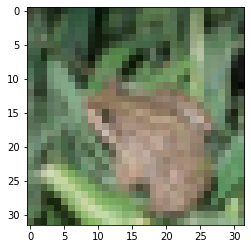

In [52]:
# Print an image (frog seems good)
image, perturbed_image = data[4]

# Reshape the iamge
image = image.reshape(3, 32, 32)

# Transpose the image
image = image.transpose(1, 2, 0)

# Display the image
plt.imshow(image)

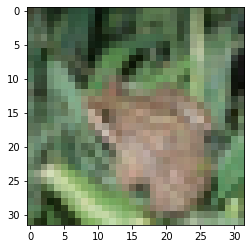

In [53]:
# Reshape the iamge
perturbed_image = perturbed_image.reshape(3, 32, 32)

# Transpose the image
perturbed_image = perturbed_image.transpose(1, 2, 0)

# Display the image
plt.imshow(perturbed_image)